## Credit Card Fraud Detection
<p align="center">
  <img src="images/credit-card-fraud-banner.jpg" alt="banner-credit-card" height="300px">
</p>
<div style="text-align: right; margin-left: auto; margin-right: auto; width: 450px;">
  <a href="http://www.freepik.com">Designed by starline / Freepik</a>
</div>

Credit card fraud remains a growing threat, costing businesses and consumers billions of dollars annually. In recent years, as digital transactions have surged, so too have the number of fraud attempts. According to industry reports, the global financial losses due to payment card fraud have reached staggering figures, with estimates exceeding $32 billion in 2023 alone.

Fraudsters are constantly evolving their tactics, making it more challenging to detect suspicious activities. However, with advances in machine learning and data analytics, businesses have new tools to combat fraud effectively. By training models on historical transaction data, we can identify patterns indicative of fraudulent behavior, thus minimizing the risk and impact.

To be less susceptible to fraud, consumers and businesses alike need to adopt multi-layered security measures, such as two-factor authentication, real-time transaction monitoring, and leveraging artificial intelligence to detect anomalies.

In this notebook, we will explore the use of machine learning to detect fraudulent credit card transactions using a dataset provided by Kaggle. The model developed here aims to showcase how modern algorithms can be applied to identify potentially fraudulent activities in a dataset with highly imbalanced classes—where legitimate transactions vastly outnumber fraudulent ones.

Our goal is to present actionable insights that can help decision-makers in reducing fraud rates and safeguarding financial assets.

### Data Acquistion

#### 1 - Import packages and initial configuration
Packages that will be used in this notebook and initial configuration of the notebook.
- `pandas` - data manipulation
- `numpy` - general manipulation of arrays
- `matplotlib` and `seaborn`- data visualization  
-  

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler


pd.set_option("display.max_columns", None)
sns.set_theme()
%matplotlib inline

#### 2 - Get familiar to the dataset

In [2]:
# dataset path
DATA_PATH = "datasets\\creditcard.csv"

# import the dataset to a dataframe
df = pd.read_csv(DATA_PATH)

# dataset size and show firsts 5 inputs
print(f"""Dataset size: \tSamples: {df.shape[0]}
      \t\tFeatures: {df.shape[1]}""")
df.head()

Dataset size: 	Samples: 284807
      		Features: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset presents transactions that occurred in two day and it contains almost 285,000 samples and 31 features. 
According to Kaggle, due to confidentiality issues, it is not allowed to provide the original features. Hence the dataset contains only numeric input variables which are the result of a PCA transformation. Principal Component Analysis (PCA) is a powerful unsupervised machine learning technique used for dimensionality reduction and feature extraction. It aims to find the principal components, which are new uncorrelated variables that capture the maximum variance in the data.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### 2.1 - Variables dictionary
- `Time`: contains the seconds elapsed between the respective transaction of the sample and the first transaction in the dataset
- `V1, V2, ..., V28`: contain the numerical values obtained from the PCA transformation
- `Amount`: contains the amount for each transaction sample
- `Class`: categorical variable that takes the value 1 for a fraudulent transaction and 0 for a valid transaction.

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data science process. It involves investigating the dataset to uncover patterns, detect anomalies, and check assumptions through visual and statistical methods. EDA helps in understanding the structure and quality of the data before applying machine learning models, ensuring that potential issues such as missing values, outliers, or skewed distributions are addressed.

In this section, we will perform a series of initial analyses to get a better understanding of the dataset. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Using the info() and isnull() methods, we can confirm that there are no missing values. Additionally, except for the Class feature, which is *int* type, all other features contain float values. The `time`, `amount`, and `Class` variables are the only ones that have not been transformed by PCA.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Using the **describe()** method, we observe that there are no discrepant values related to the PCA transformation.
the mean transaction value is 88.34, the median is 22.00, and the maximum value is 25,691.16. The significant difference between the mean and median suggests the presence of high-value outliers.
Finally, as expected for the Class variable, the maximum value is 1, indicating a fraudulent transaction.

In [6]:
valid_transaction = df["Class"].value_counts()[0]
fraud_transaction = df["Class"].value_counts()[1]
print(f"Valid transactions: \t {valid_transaction} -> {(valid_transaction/df.shape[0]*100):.3f}%")
print(f"Fraudulent transactions: {fraud_transaction}    -> {(fraud_transaction/df.shape[0]*100):.3f}%")

Valid transactions: 	 284315 -> 99.827%
Fraudulent transactions: 492    -> 0.173%


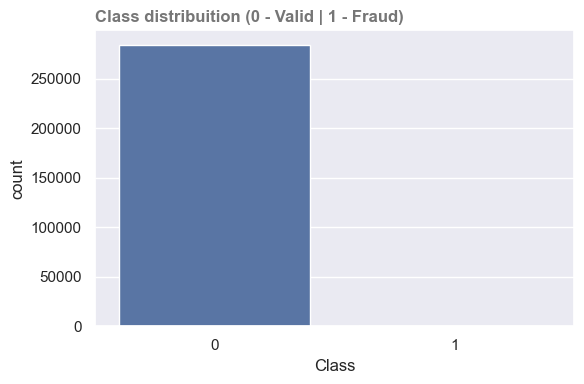

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=df["Class"], ax=ax)
ax.set_title("Class distribuition (0 - Valid | 1 - Fraud)", fontsize=12, fontweight="bold", color="#767676",loc="left")
plt.tight_layout()

As mentioned above, the dataset is highly imbalanced, related to the target variable Class type (indicating valid or fraudulent transaction). This imbalance is expected, as in real-world credit card usage, valid transactions far exceed fraudulent ones. In this dataset, valid transactions account for 99.827% of the samples, while fraudulent transactions represent only 0.173%.

This imbalance can negatively affect the performance of the machine learning model. Therefore, before training the model, it will be necessary to balance the dataset to build a non-biased model.

By using the two features that were not subjected to the PCA transformation, we can observe the frequency of these features over the 48-hour period.

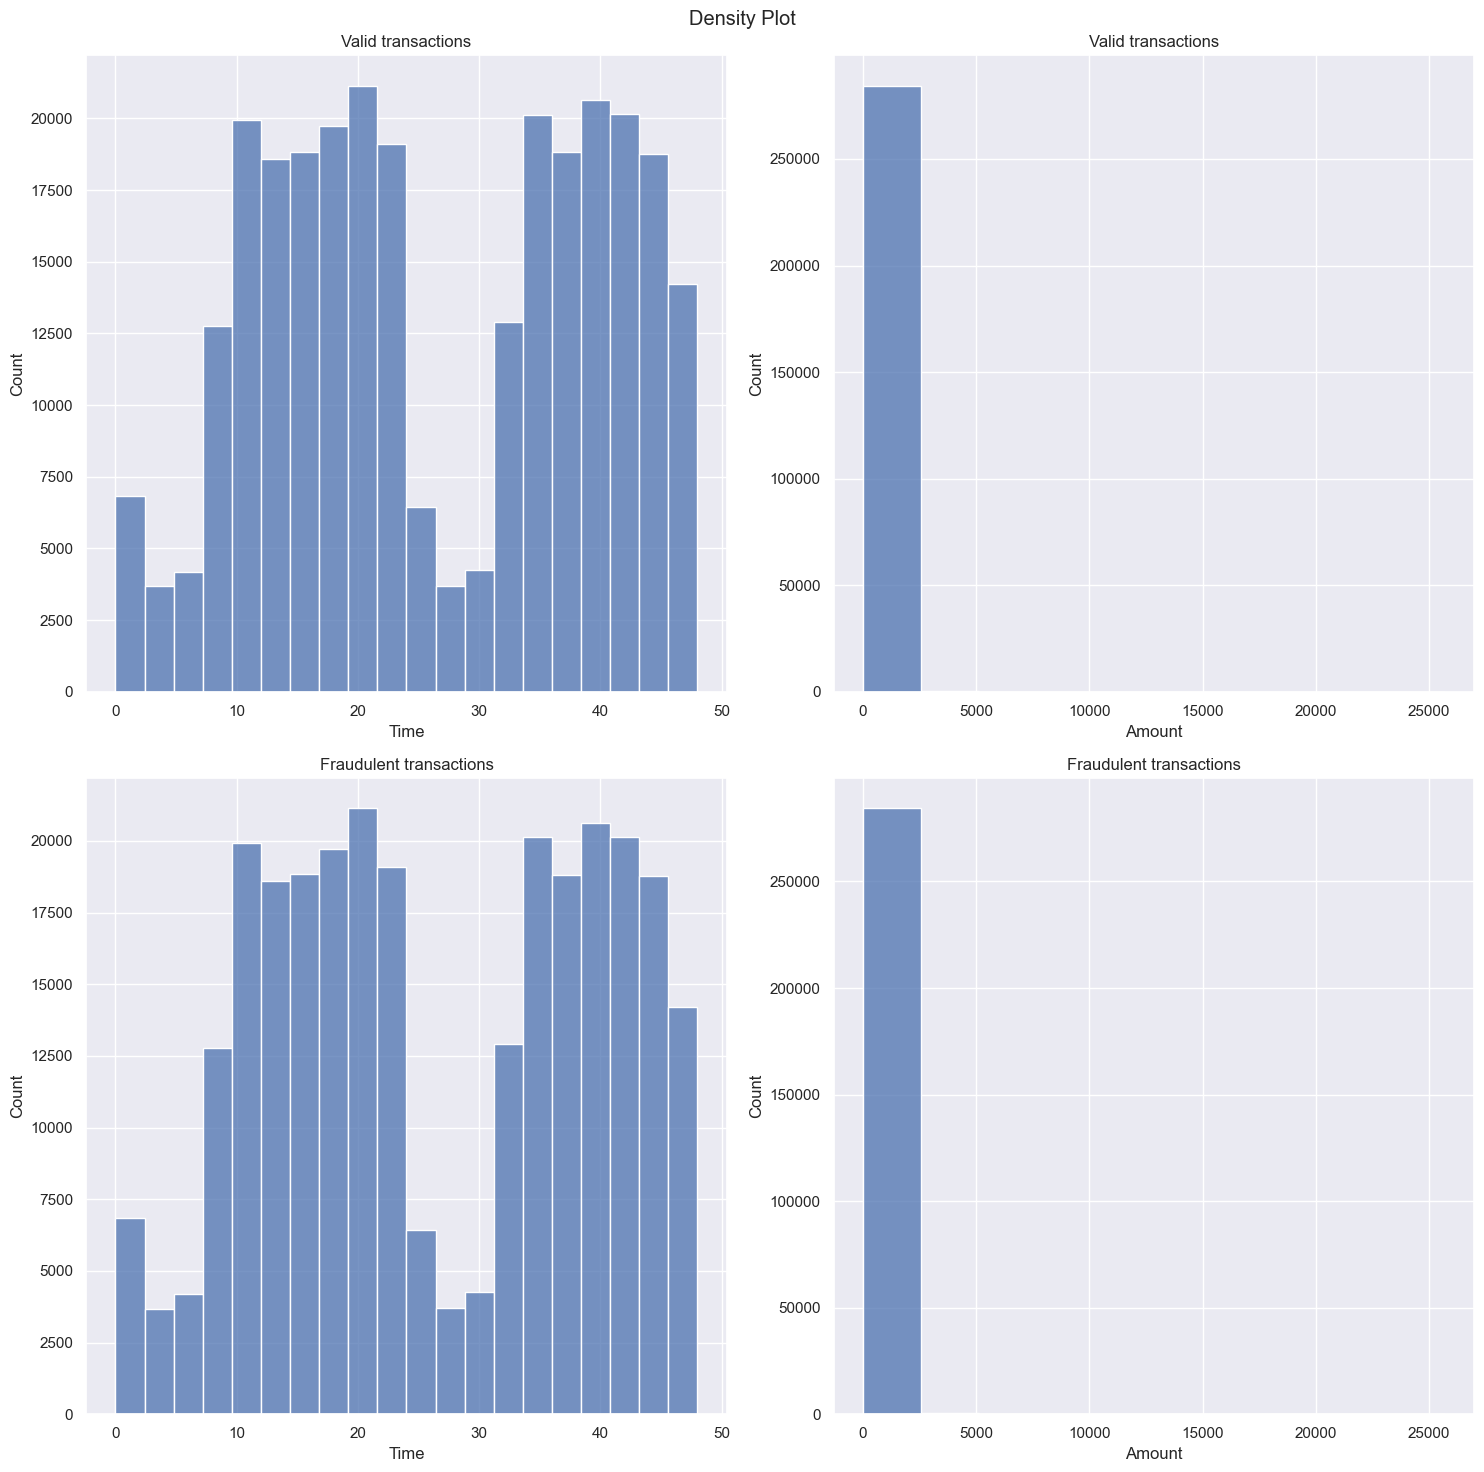

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.histplot(data=df[df["Class"]==0], x=df["Time"]/3600, bins=20, ax=ax1)
sns.histplot(data=df[df["Class"]==1], x=df["Time"]/3600, bins=20, ax=ax3)
sns.histplot(data=df[df["Class"]==0], x=df["Amount"], bins=10, ax=ax2)
sns.histplot(data=df[df["Class"]==1], x=df["Amount"], bins=10, ax=ax4)

fig.suptitle("Density Plot")
ax1.set_title("Valid transactions")
ax3.set_title("Fraudulent transactions")
ax2.set_title("Valid transactions")
ax4.set_title("Fraudulent transactions")



plt.tight_layout()  # Adjust spacing between subplots 
plt.show()


When comparing the histograms of valid and fraudulent transactions for the ``Time`` and ``Amount`` features, there is no significant difference that could assist the machine learning model in classifying the transactions. Additionally, it is highly likely that there are outliers in the ``Amount`` feature. Therefore, boxplots will now be plotted to check for any potential differences.

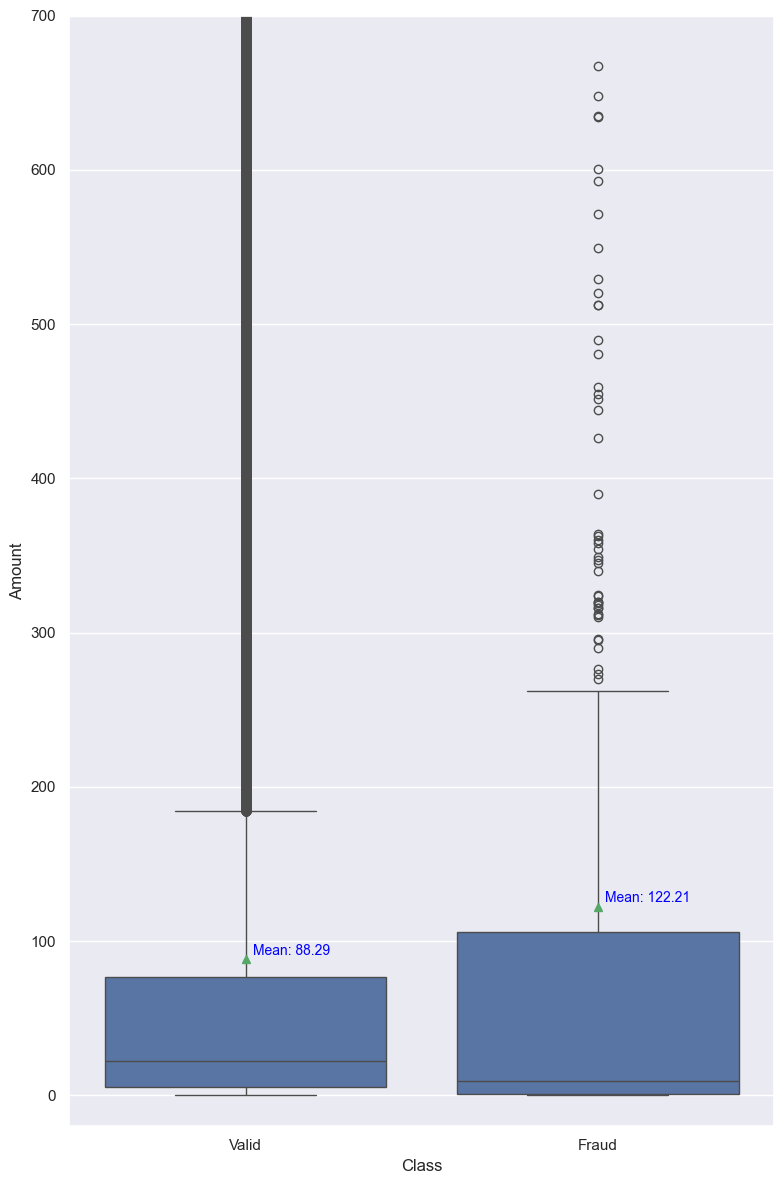

In [9]:
fig, ax = plt.subplots(figsize=(8,12), sharex=True)
sns.boxplot(data=df, x=df["Class"], y=df["Amount"], showmeans=True, ax=ax)
plt.ylim((-20,700))
plt.xticks([0,1],["Valid", "Fraud"])

mean_valid = df.groupby(by="Class")["Amount"].mean()[0]
mean_fraud = df.groupby(by="Class")["Amount"].mean()[1]

# Add mean values as text annotations
ax.text(ax.get_xticks()[0]+0.02, mean_valid + 1, f"Mean: {mean_valid:.2f}", ha='left', va='bottom', fontsize=10, color='blue')
ax.text(ax.get_xticks()[1]+0.02, mean_fraud + 1, f"Mean: {mean_fraud:.2f}", ha='left', va='bottom', fontsize=10, color='blue')

plt.tight_layout()





The boxplots reveal a noticeable difference between fraudulent and valid transactions, and confirms the existence of outliers. Additionally, the mean value for fraudulent transactions is higher than that for valid transactions. This difference could contribute to improving the performance of the machine learning model during training.

Another visualization that helps understand which features are the most important to detect the fraudulents transaction is the density plot. In the density plot we look for difference between the types of transaction.

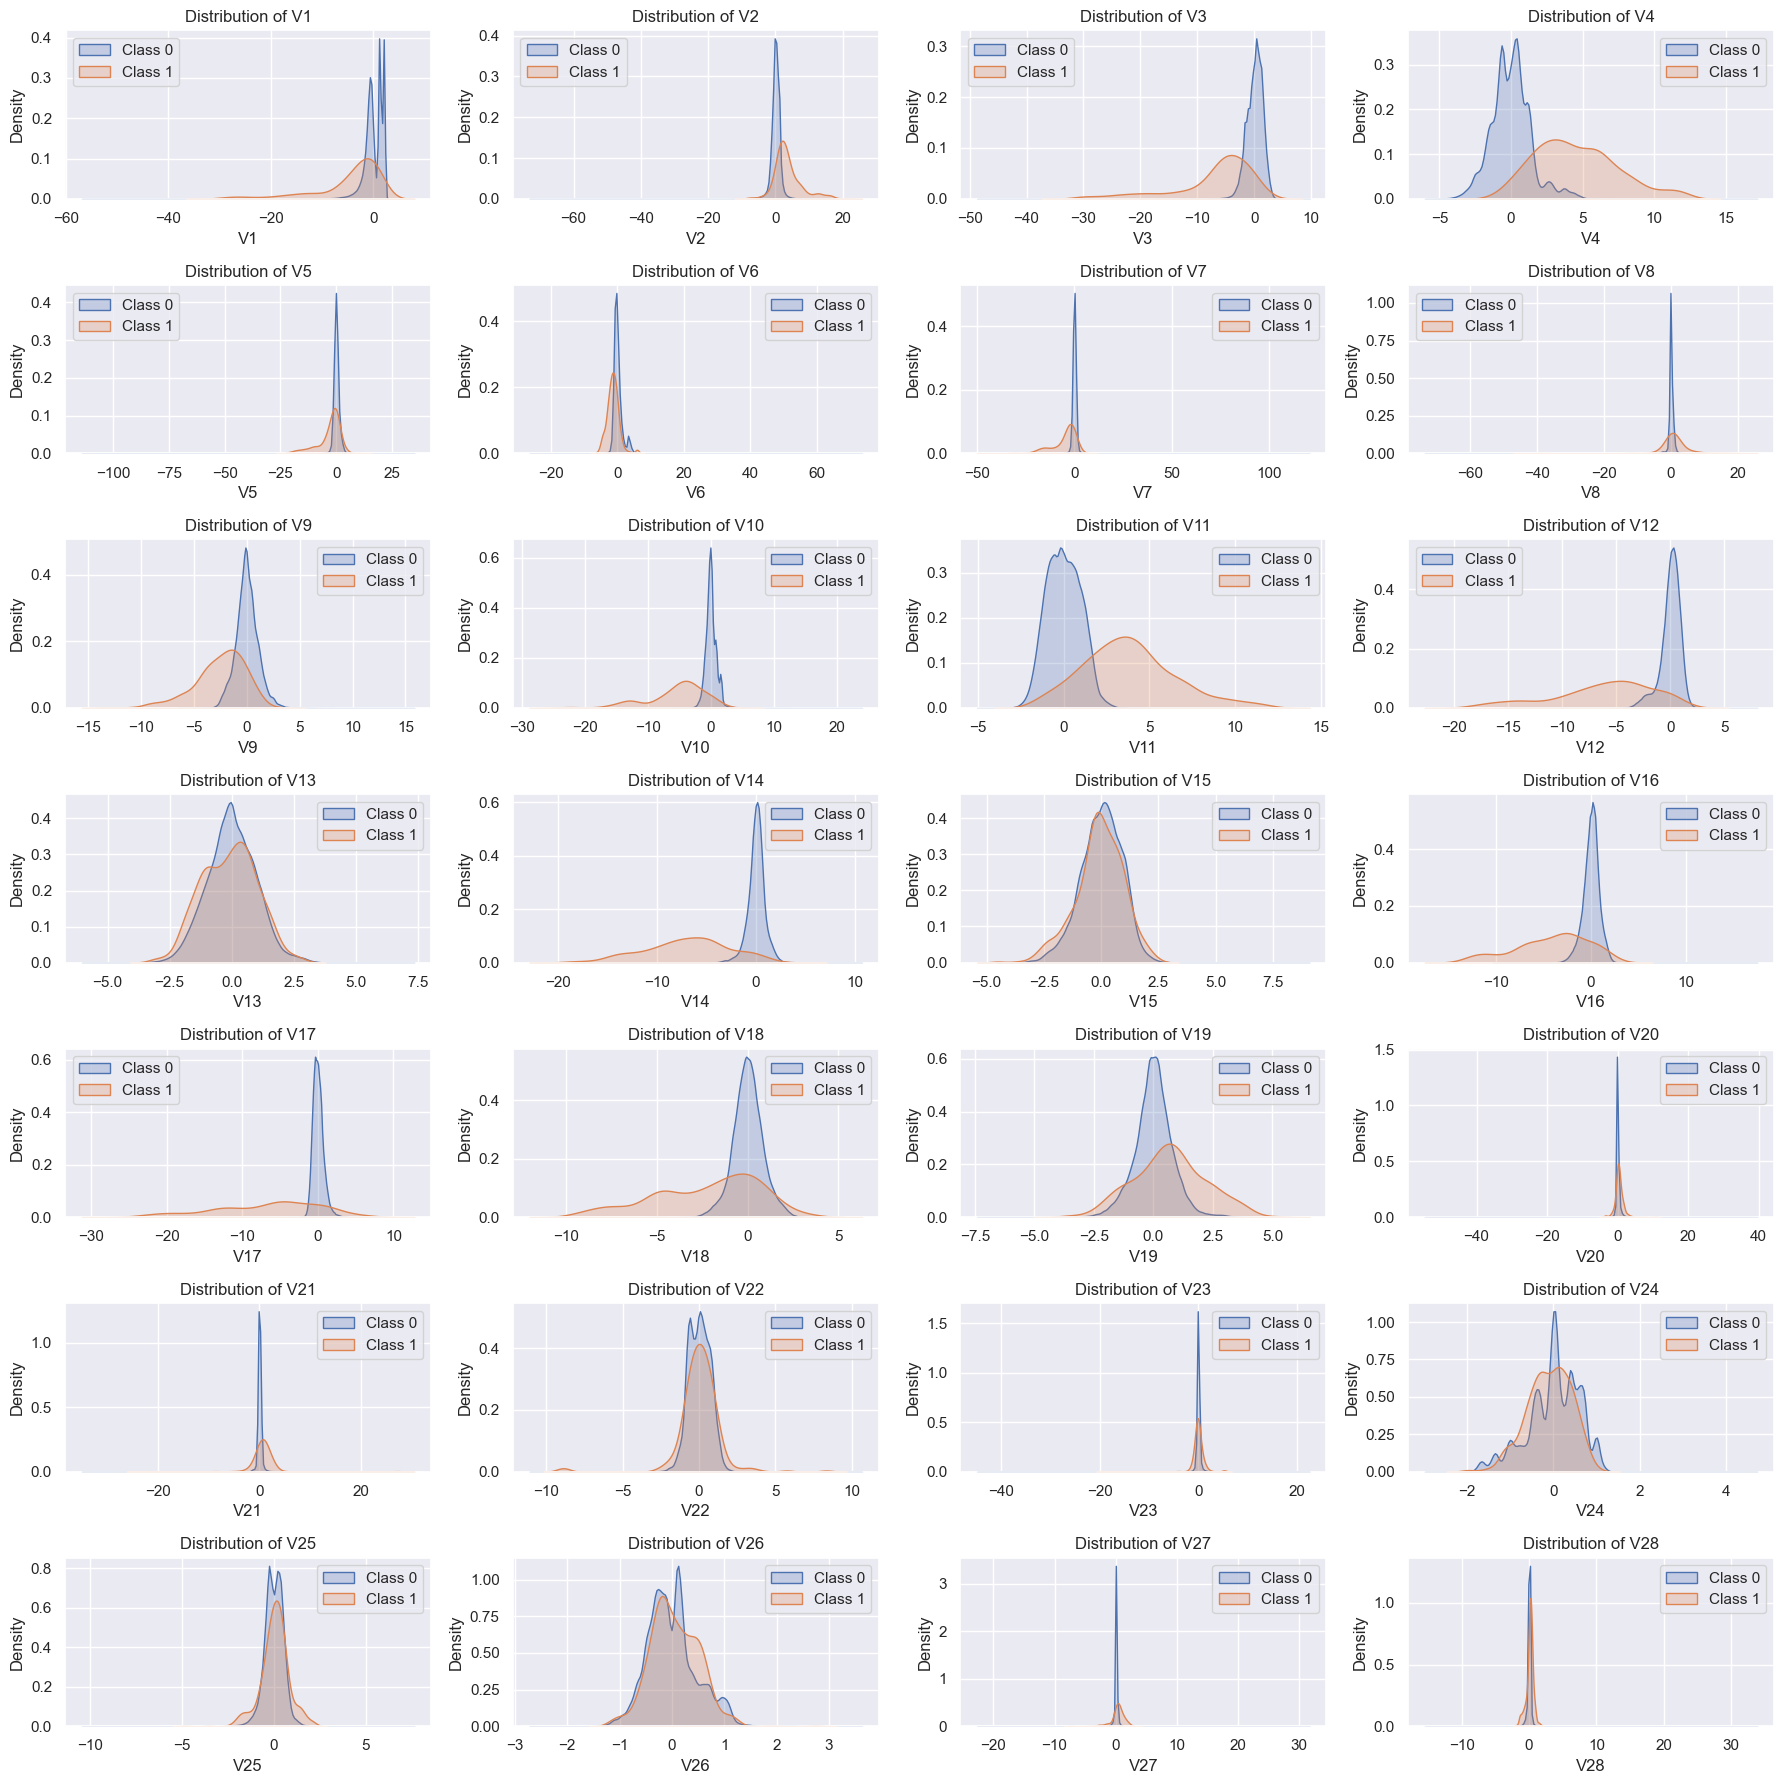

In [10]:
pda_features = df.drop(["Time", "Amount", "Class"], axis=1).columns

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(18, 18))

axes = axes.flatten()

for idx, feature in enumerate(pda_features):
    sns.kdeplot(data=df[df["Class"]==0], x=feature, fill=True, label="Class 0", ax=axes[idx])
    sns.kdeplot(data=df[df["Class"]==1], x=feature, fill=True, label="Class 1", ax=axes[idx])
    axes[idx].set_title(f"Distribution of {feature}")
    axes[idx].legend()

plt.tight_layout()



These density plots reveal that certain variables may be highly important for training the machine learning model, as they exhibit different distributions between valid and fraudulent transactions. This is the case for features such as V3, V4, V10, V11, V12, V14, V16, V17. On the other hand, some features, like V13, V15, V22, V25, V26, V28, likely won't be as important, since their distributions are very similar for both types of transactions.

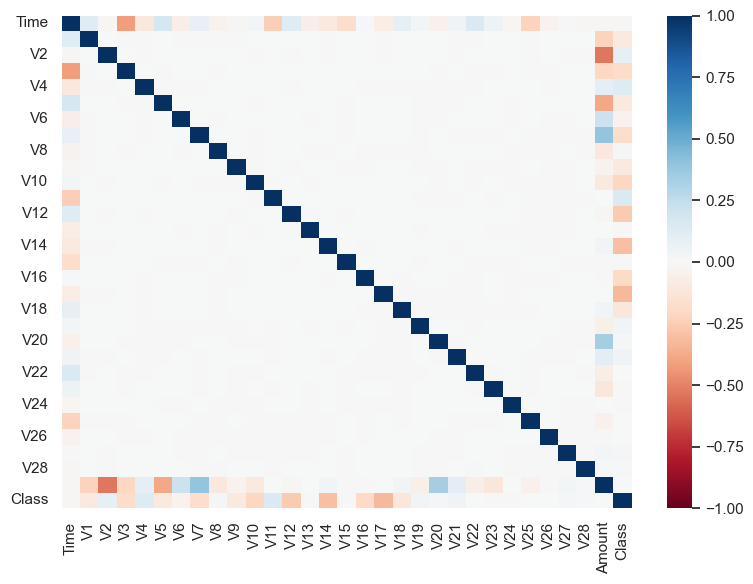

In [11]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=df_corr, cmap="RdBu", vmin=-1)

plt.tight_layout()

In summary, the Exploratory Data Analysis (EDA) has shown the following:

- The dataset is highly imbalanced, with valid transactions representing 99.827% and fraudulent transactions only 0.173% of the data.
- There are no missing values, but outliers are present.
- All feature values are composed of float values.
- It will be necessary to standardize the Time and Amount variables.
- The correlation between variables is low.
- The density plots revealed that some variables have very similar distributions, while others have distinct distributions, which could contribute to model training."


### Data pre-processing

#### 1 - Standardize

In the world of machine learning, not all data is created equal. Features with vastly different scales can introduce bias and hinder the performance of many algorithms. That's where standardization, a powerful preprocessing technique, comes to the rescue.

**Why Standardize?**

Imagine training a model to predict house prices. You have features like "number of bedrooms" (ranging from 1 to 5) and "house area in square feet" (ranging from 800 to 5000). The large difference in scales can mislead some algorithms, making them prioritize the "house area" feature simply because its values are numerically larger.

Standardization levels the playing field by transforming each feature to have:
- Mean (average) of 0
- Standard deviation of 1

This ensures that all features contribute equally to the model's learning process, regardless of their original scales.

**How it Works:**

Standardization, also known as Z-score normalization, follows a simple yet effective formula:

*z = (x - mean) / standard deviation*

Where:
- z is the standardized value
- x is the original value
- mean is the average of the feature
- standard deviation measures the spread or variability of the feature

**Benefits:**

- Improved Model Performance: By mitigating the impact of scale differences, standardization can lead to faster model training and more accurate predictions, particularly for algorithms like K-Nearest Neighbors, Support Vector Machines, and those using regularization techniques.
- Reduced Bias: Standardization helps prevent features with larger ranges from disproportionately influencing the model, ensuring fairness in feature importance.

In the code cell below, we'll use scikit-learn's method StandardScaler to perform standardization on `Time` and `Amount` variables.

In [12]:
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean["std_time"] = std_scaler.fit_transform(df_clean["Time"].values.reshape(-1,1))
df_clean["std_amount"] = std_scaler.fit_transform(df_clean["Amount"].values.reshape(-1,1))

df_clean.drop(["Time", "Amount"], axis=1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_time,std_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


#### 2 - Dataset Splitting: Training, Validation, and Test Sets

In [13]:
# dataset for test
test = df_clean.sample(frac=0.15, random_state=0)

# remove the test data from the original dataset
df_clean = df_clean.drop(test.index)

print("Test dataset dimension:", test.shape)
print("Training/validation dataset dimension:", df_clean.shape)
print("Original dataset dimension:", df.shape)


Test dataset dimension: (42721, 31)
Training/validation dataset dimension: (242086, 31)
Original dataset dimension: (284807, 31)


In [14]:
# dataset for training and validation and target variable y
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# Splitting the dataset into training and validation datasets
# stratify = y -> ensures that the class distribution in your original dataset (y) is proportionally maintained in both the training and validation sets.
# shuffle = True -> helps prevent potential biases that might arise if your data has some inherent order
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

#### 3 - Balancing the dataset

Class
0    313
1    313
Name: count, dtype: int64

Dimension before balancing: (181564,)
Dimension after balancing: (626,)


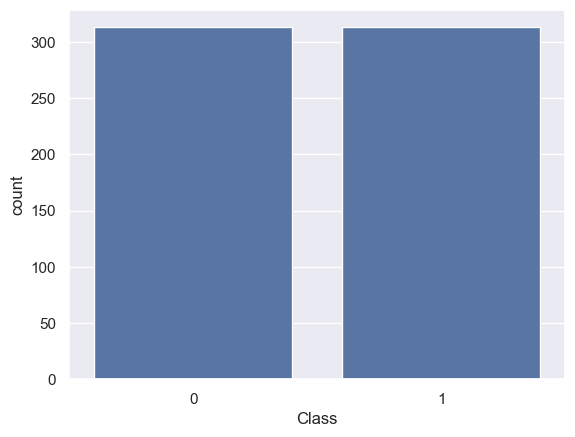

In [15]:
# using under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus, = rus.fit_resample(X_train, y_train)

# verifying the balance
print(pd.Series(y_rus).value_counts())

fig, ax = plt.subplots()
sns.countplot(x=y_rus, ax=ax)

print("\nDimension before balancing:", y_train.shape)
print("Dimension after balancing:", y_rus.shape)

#### 4 - Correlation Matrix after balancing

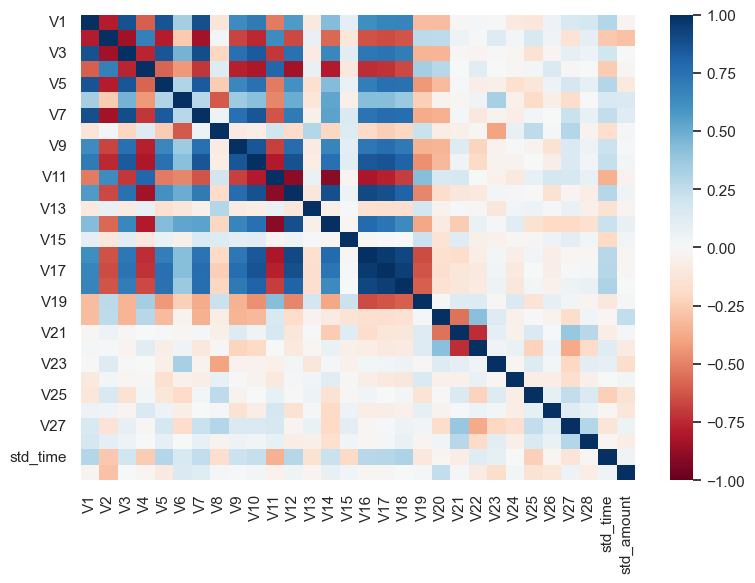

In [16]:
df_corr_rus = X_rus.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=df_corr_rus,cmap="RdBu", vmin=-1)
plt.tight_layout()

### Machine Learning Models
After understanding the data, standardizing the features, splitting the dataset into training, validation, and test sets, identifying the target variable, and balancing the dataset, it is now ready for model training. Since we are interested in classifying transactions as fraud or non-fraud, we will explore several classification models, including Logistic Regression, Decision Tree, K-Nearest Neighbors, and Random Forest Classifier. We will use a supervised learning approach, where the model will learn from the labeled training data to predict new transactions.

#### 1 - Logistic Regression
Logistic Regression is a powerful algorithm for classification tasks, making it perfect for our goal of labeling credit card transactions as fraudulent or legitimate.

Here's a breakdown:

**1. What it does:**

Unlike linear regression which predicts continuous values, Logistic Regression predicts the probability of an instance belonging to a specific class. In our case, it estimates the likelihood of a transaction being fraudulent.

It achieves this by fitting a sigmoid function to the data, which always outputs a value between 0 and 1, representing the probability.

A predefined threshold (usually 0.5) is then used to classify the transaction:

Probability > threshold = Fraudulent

Probability <= threshold = Legitimate

**2. Why it's suitable for our project:**

Interpretability: Logistic Regression provides insights into the importance of different features in predicting fraud, allowing us to understand the factors driving the model's decisions. This is crucial for explaining our model's behavior and building trust in its predictions.

Efficiency: It's computationally less expensive compared to more complex algorithms, making it suitable for large datasets like ours and enabling faster training and prediction times.

Good Baseline: Logistic Regression often serves as a strong baseline model for classification tasks. It helps us gauge the performance of more complex models and understand if their added complexity is justified by improved accuracy.

**3. Limitations to consider:**

Assumptions: Logistic Regression assumes a linear relationship between the features and the log-odds of the target variable. While this assumption might not always hold true in complex datasets, feature engineering techniques can help address this limitation.

Sensitivity to outliers: Similar to linear regression, outliers can significantly influence the model's performance. Therefore, robust preprocessing steps like outlier detection and treatment are crucial.

**Moving forward:**

In the following sections, we'll delve into the implementation of Logistic Regression for our credit card fraud detection project. We will evaluate the model using appropriate metrics like precision, recall, and F1-score, and interpret the results to gain valuable insights from our model.

In [20]:
# defining and training the LR model
np.random.seed(2)
model_lr = LogisticRegression()
model_lr.fit(X_rus, y_rus)

# forecast using validation dataset
y_pred_lr = model_lr.predict(X_val)
y_prob_lr = model_lr.predict_proba(X_val)

print("y_pred_lr: ", y_pred_lr[:30])
print("\ny_prob_lr:\n", y_prob_lr[:30])

y_pred_lr:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

y_prob_lr:
 [[0.92635268 0.07364732]
 [0.97140174 0.02859826]
 [0.99523903 0.00476097]
 [0.97731576 0.02268424]
 [0.99787352 0.00212648]
 [0.97666115 0.02333885]
 [0.96713087 0.03286913]
 [0.95523328 0.04476672]
 [0.98311601 0.01688399]
 [0.9495345  0.0504655 ]
 [0.94219427 0.05780573]
 [0.92876022 0.07123978]
 [0.98921554 0.01078446]
 [0.9791028  0.0208972 ]
 [0.92778983 0.07221017]
 [0.23383516 0.76616484]
 [0.92732329 0.07267671]
 [0.98687408 0.01312592]
 [0.97735954 0.02264046]
 [0.9803039  0.0196961 ]
 [0.52424287 0.47575713]
 [0.90630427 0.09369573]
 [0.99140466 0.00859534]
 [0.91392433 0.08607567]
 [0.95583741 0.04416259]
 [0.9988279  0.0011721 ]
 [0.99222756 0.00777244]
 [0.95414123 0.04585877]
 [0.75164535 0.24835465]
 [0.12002022 0.87997978]]


The `predict` method allows us to classify each transaction, where 0 represents a valid transaction and 1 represents a fraudulent one. Additionally, the `predict_proba` method provides the probability of a transaction being classified as valid (first element) or fraudulent (second element).

Classification report:
               precision    recall  f1-score   support

           0     0.9998    0.9676    0.9834     60417
           1     0.0467    0.9143    0.0888       105

    accuracy                         0.9675     60522
   macro avg     0.5233    0.9409    0.5361     60522
weighted avg     0.9982    0.9675    0.9819     60522

Accuracy: 0.9675
AUC: 0.9409



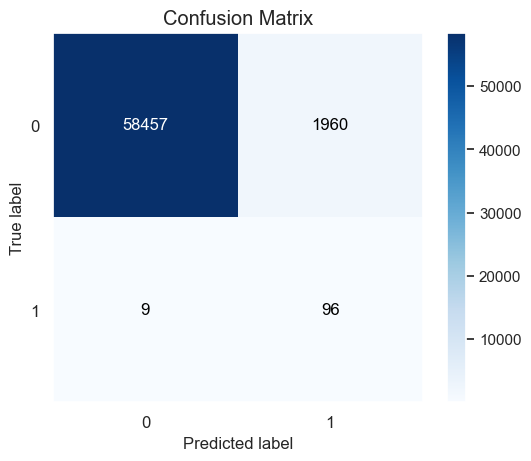

In [25]:
# confusion matrix plot
skplt.metrics.plot_confusion_matrix(y_val, y_pred_lr)

# Classification report
print("Classification report:\n", classification_report(y_val, y_pred_lr, digits=4))

# Accuracy and area under the curve
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_pred_lr):.4f}\n")
plt.show()



The Confusion Matrix provides a clear view of the model’s performance by comparing true values with predicted values. In this validation dataset, there are 60,417 valid transactions (58,457 + 1,960) and 105 fraudulent transactions (9 + 96).

Regarding the true values, among the total valid transactions, 58,457 were correctly predicted (96.76%), while 1,960 were incorrectly predicted as fraudulent (3.24%). For the fraudulent transactions, 96 were correctly predicted (91.43%) and 9 were incorrectly classified as valid (8.57%).

When looking at the predicted values, of the total predicted fraudulent transactions (96 + 1,960 = 2,056), 96 were correct (4.67%), and 1,960 were incorrect (95.33%). For predicted valid transactions (58,457 + 9 = 58,466), 58,457 were correct (99.98%), and 9 were incorrect (0.02%).

The model achieved an overall accuracy of 96.75%, indicating that 96.75% of all predictions, both fraud and non-fraud, were correct. Additionally, the AUC (Area Under the Curve) was 94.09%.

